In [53]:
import numpy as np
import pandas as pd
import re

In [54]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [55]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [56]:
df.duplicated().sum()

np.int64(122)

In [57]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ats triumph,sector 104,2.78,8825.0,3150.0,Super Built up area 3150(292.64 sq.m.),4.0,4.0,3+,servant room,11.0,South,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade Mall', 'Dhanwapur Road', 'Dwarka Expressway', 'Govt. PG College', 'Delhi Public School', 'The NorthCap University', 'Shree Krishna Hospital', 'Indira Gandhi International Airport', 'Basai Dhankot', 'The Executive Centre', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


## 1. areaWithType

In [58]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
510,1.29,1816.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1817 sq.ft. (168.8 sq.m.)Carpet area: 1816 sq.ft. (168.71 sq.m.)
1408,3.25,981.0,Plot area 109(91.14 sq.m.)
180,2.55,2273.0,Super Built up area 2273(211.17 sq.m.)Carpet area: 1340 sq.ft. (124.49 sq.m.)
1417,1.25,1930.0,Super Built up area 1930(179.3 sq.m.)
442,1.43,1990.0,Super Built up area 1990(184.88 sq.m.)Carpet area: 1680 sq.ft. (156.08 sq.m.)


In [59]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [60]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [61]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [62]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [63]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
186,0.53,house,363.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
864,2.35,flat,1777.0,Super Built up area 1777(165.09 sq.m.),1777.0,NaN,NaN
534,2.24,flat,1549.0,Super Built up area 1549(143.91 sq.m.),1549.0,NaN,NaN
847,2.36,flat,2570.0,Super Built up area 2875(267.1 sq.m.)Carpet area: 2570 sq.ft. (238.76 sq.m.),2875.0,NaN,2570.0
1455,1.60,flat,2120.0,Super Built up area 2120(196.95 sq.m.)Carpet area: 1450 sq.ft. (134.71 sq.m.),2120.0,NaN,1450.0


In [64]:
df.duplicated().sum()

np.int64(122)

In [65]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [66]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.75,house,1701.0,Plot area 189(158.03 sq.m.),NaN,NaN,NaN
9,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,NaN,NaN
15,1.45,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
25,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,NaN,NaN
33,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN


In [67]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [68]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [69]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.75,house,1701.0,Plot area 189(158.03 sq.m.),NaN,NaN,NaN
9,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,NaN,NaN
15,1.45,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
25,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,NaN,NaN
33,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN


In [70]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [71]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [72]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [73]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.75,house,1701.0,Plot area 189(158.03 sq.m.),NaN,189.00,NaN
9,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
15,1.45,house,540.0,Plot area 60(50.17 sq.m.),NaN,60.00,NaN
25,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,135.00,NaN
33,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
35,8.40,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
52,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.00,NaN
64,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
68,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
73,10.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN


In [74]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [75]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [76]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.75,house,1701.0,Plot area 189(158.03 sq.m.),NaN,1701.00,NaN
9,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
15,1.45,house,540.0,Plot area 60(50.17 sq.m.),NaN,540.00,NaN
25,2.10,house,1215.0,Plot area 135(112.88 sq.m.),NaN,1215.00,NaN
33,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
35,8.40,house,4000.0,Plot area 4000(371.61 sq.m.),NaN,4000.00,NaN
52,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.00,NaN
64,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
68,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
73,10.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN


In [77]:
# update the original dataframe
df.update(all_nan_df)

In [78]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [79]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,ats triumph,sector 104,2.78,8825.0,3150.0,Super Built up area 3150(292.64 sq.m.),4.0,4.0,3+,servant room,11.0,South,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade Mall', 'Dhanwapur Road', 'Dwarka Expressway', 'Govt. PG College', 'Delhi Public School', 'The NorthCap University', 'Shree Krishna Hospital', 'Indira Gandhi International Airport', 'Basai Dhankot', 'The Executive Centre', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3150.0,NaN,NaN
1,flat,dlf ridgewood estate,sector 28,2.00,14598.0,1370.0,Super Built up area 1370(127.28 sq.m.),3.0,3.0,1,not available,12.0,North-East,10+ Year Old,"['Huda Metro Station', 'Sahara Mall', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['4 Fan', '1 Exhaust Fan', '3 Geyser', '8 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '6 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']",1370.0,NaN,NaN
2,flat,umang winter hills,sector 77,1.10,5296.0,2077.0,Super Built up area 2077(192.96 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,4.0,3+,servant room,9.0,North,1 to 5 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2077.0,NaN,1600.0
3,flat,puri emerald bay,sector 104,2.23,9911.0,2250.0,Super Built up area 2450(227.61 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),3.0,4.0,3+,servant room,10.0,East,1 to 5 Year Old,"['Sector-21 Metro Dwarka', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Chauma Road', 'Delhi Public School', 'DPG Degree College', 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Infinity Business Park', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['5 Fan', '1 Exhaust Fan', '16 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room'

## 2.additionalRoom

In [80]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
"study room,servant room",99
store room,99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [81]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [82]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
677,"study room,others,servant room",1,1,0,0,1
2652,not available,0,0,0,0,0
2373,"pooja room,study room,servant room,store room",1,1,1,1,0
364,not available,0,0,0,0,0
59,"pooja room,study room,servant room",1,1,0,1,0


In [83]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ats triumph,sector 104,2.78,8825.0,3150.0,Super Built up area 3150(292.64 sq.m.),4.0,4.0,3+,servant room,11.0,South,1 to 5 Year Old,"['IFFCO Chowk Metro Station', 'The Esplanade Mall', 'Dhanwapur Road', 'Dwarka Expressway', 'Govt. PG College', 'Delhi Public School', 'The NorthCap University', 'Shree Krishna Hospital', 'Indira Gandhi International Airport', 'Basai Dhankot', 'The Executive Centre', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3150.0,NaN,NaN,0,1,0,0,0
1,flat,dlf ridgewood estate,sector 28,2.00,14598.0,1370.0,Super Built up area 1370(127.28 sq.m.),3.0,3.0,1,not available,12.0,North-East,10+ Year Old,"['Huda Metro Station', 'Sahara Mall', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['4 Fan', '1 Exhaust Fan', '3 Geyser', '8 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '6 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']",1370.0,NaN,NaN,0,0,0,0,0
2,flat,umang winter hills,sector 77,1.10,5296.0,2077.0,Super Built up area 2077(192.96 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,4.0,3+,servant room,9.0,North,1 to 5 Year Old,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2077.0,NaN,1600.0,0,1,0,0,0
3,flat,puri emerald bay,sector 104,2.23,9911.0,2250.0,Super Built up area 2450(227.61 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),3.0,4.0,3+,servant room,10.0,East,1 to 5 Year Old,"['Sector-21 Metro Dwarka', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Chauma Road', 'Delhi Public School', 'DPG Degree College', 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Infinity Business Park', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['5 Fan', '1 Exhaust Fan', '16 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceili

## 3.agePossession

In [84]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,575
0 to 1 Year Old,530
undefined,332
10+ Year Old,310
Under Construction,90
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [85]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [86]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [87]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,626
Moderately Old,575
Undefined,333
Old Property,310
Under Construction,283


In [88]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ats triumph,sector 104,2.78,8825.0,3150.0,Super Built up area 3150(292.64 sq.m.),4.0,4.0,3+,servant room,11.0,South,Relatively New,"['IFFCO Chowk Metro Station', 'The Esplanade Mall', 'Dhanwapur Road', 'Dwarka Expressway', 'Govt. PG College', 'Delhi Public School', 'The NorthCap University', 'Shree Krishna Hospital', 'Indira Gandhi International Airport', 'Basai Dhankot', 'The Executive Centre', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3150.0,NaN,NaN,0,1,0,0,0
1,flat,dlf ridgewood estate,sector 28,2.00,14598.0,1370.0,Super Built up area 1370(127.28 sq.m.),3.0,3.0,1,not available,12.0,North-East,Old Property,"['Huda Metro Station', 'Sahara Mall', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['4 Fan', '1 Exhaust Fan', '3 Geyser', '8 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '6 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']",1370.0,NaN,NaN,0,0,0,0,0
2,flat,umang winter hills,sector 77,1.10,5296.0,2077.0,Super Built up area 2077(192.96 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,4.0,3+,servant room,9.0,North,Relatively New,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2077.0,NaN,1600.0,0,1,0,0,0
3,flat,puri emerald bay,sector 104,2.23,9911.0,2250.0,Super Built up area 2450(227.61 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),3.0,4.0,3+,servant room,10.0,East,Relatively New,"['Sector-21 Metro Dwarka', 'Gurgaon Dreamz Mall', 'Dwarka Expressway', 'Chauma Road', 'Delhi Public School', 'DPG Degree College', 'The NorthCap University', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'Infinity Business Park', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['5 Fan', '1 Exhaust Fan', '16 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling 

## 4.furnishDetails

In [89]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2950,"['5 Wardrobe', '8 Fan', '1 Exhaust Fan', '5 Geyser', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3107,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '1 Light', '1 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '1 Wardrobe', '1 Microwave', 'No Bed', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3655,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '1 Modular Kitchen', '6 AC', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1516,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '1 Curtains', '5 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1442,[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [90]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [91]:
furnishings_df.shape

(3803, 19)

In [92]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-92-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [93]:
furnishings_df.sample(5)

,Chimney,Modular Kitchen,Dining Table,TV,Exhaust Fan,Stove,Wardrobe,Sofa,Geyser,Microwave,Washing Machine,Light,AC,Fridge,Water Purifier,Fan,Curtains,Bed
3449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1754,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2108,1,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,1,0
646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1391,1,0,0,0,1,0,5,0,5,0,0,15,0,0,0,6,0,0


In [94]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [96]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

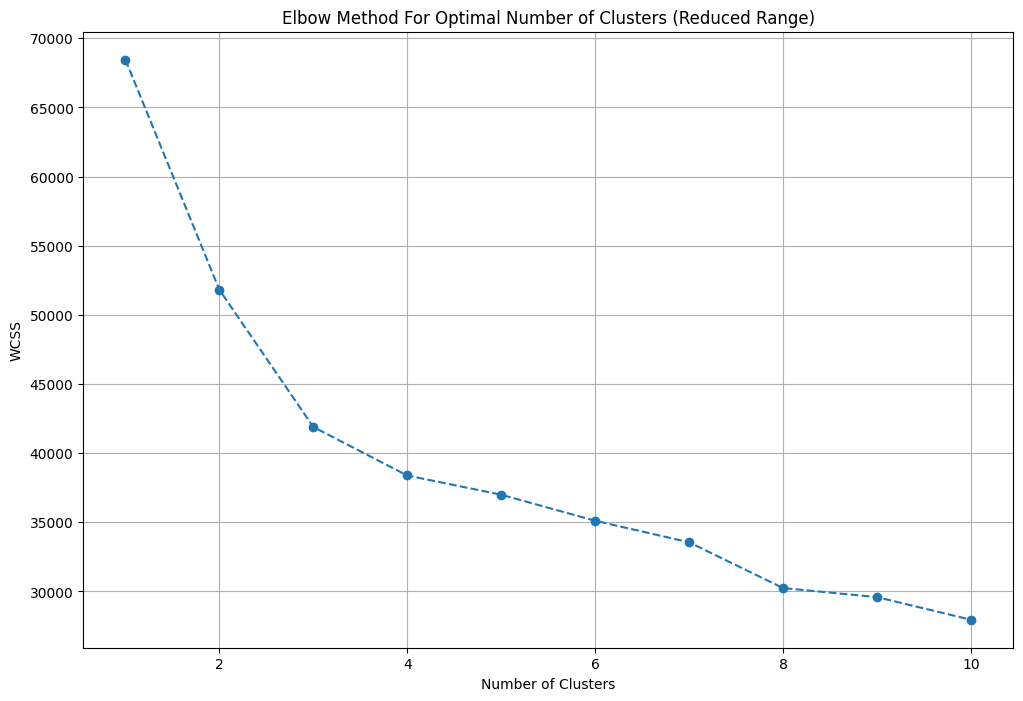

In [97]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [98]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [99]:
df = df.iloc[:,:-18]

In [100]:
df['furnishing_type'] = cluster_assignments

In [101]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3198,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '1 Stove', '8 Light', '1 Modular Kitchen', '1 Curtains', '1 Chimney', '2 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
3149,"['1 Exhaust Fan', '2 Geyser', '1 Stove', '3 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
3534,"['5 Fan', '1 Exhaust Fan', '2 Geyser', '5 Light', '5 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
3635,NaN,0
3466,"['1 Water Purifier', '6 Fan', '1 Exhaust Fan', '2 Geyser', '1 Stove', '16 Light', '3 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",1


## 5.features

In [102]:
df[['society','features']].sample(5)

,society,features
1396,dlf the arbour,NaN
2226,dlf new town heights,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1940,signature global orchard avenue,NaN
29,woodstock floors,"['Security / Fire Alarm', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"
2567,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"


In [103]:
df['features'].isnull().sum()

np.int64(635)

In [104]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [105]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [106]:
temp_df = df[df['features'].isnull()]

In [107]:
temp_df.shape

(635, 26)

In [108]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [109]:
df.loc[temp_df.index,'features'] = x.values

In [110]:
df['features'].isnull().sum()

np.int64(481)

In [111]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [112]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [113]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2299,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
features_binary_df.shape

(3803, 130)

In [115]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

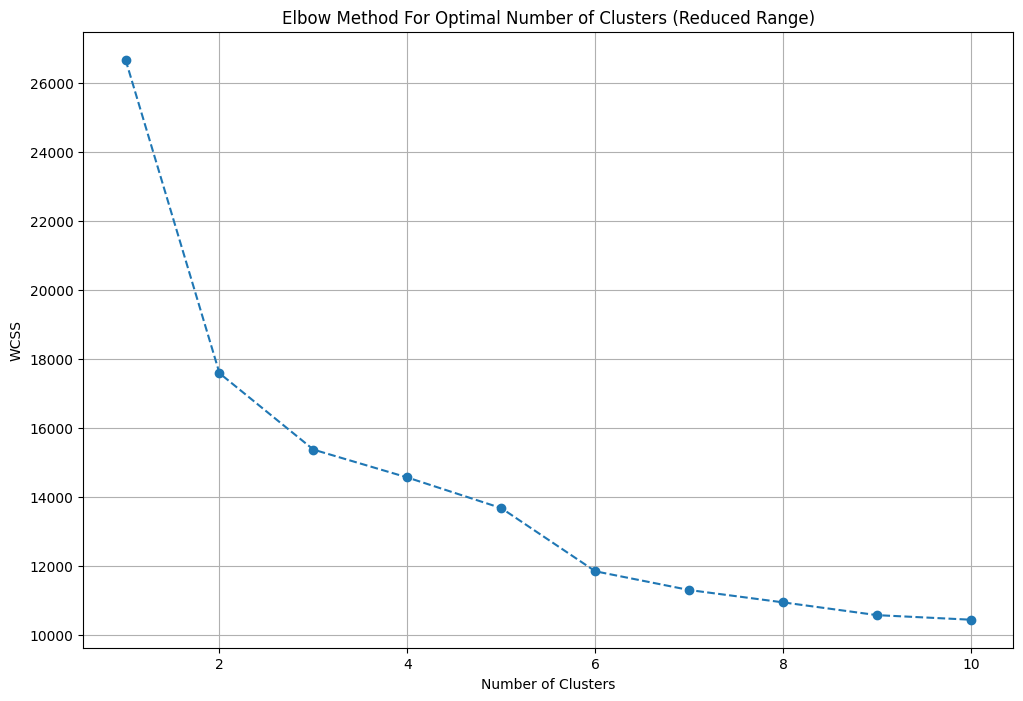

In [116]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [117]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [118]:
df['luxury_score'] = luxury_score

In [119]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,ats triumph,sector 104,2.78,8825.0,3150.0,Super Built up area 3150(292.64 sq.m.),4.0,4.0,3+,servant room,11.0,South,Relatively New,"['IFFCO Chowk Metro Station', 'The Esplanade Mall', 'Dhanwapur Road', 'Dwarka Expressway', 'Govt. PG College', 'Delhi Public School', 'The NorthCap University', 'Shree Krishna Hospital', 'Indira Gandhi International Airport', 'Basai Dhankot', 'The Executive Centre', 'Park Inn', ""Oyster's Water Park"", 'DLF Golf and Country Club']",[],"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3150.0,NaN,NaN,0,1,0,0,0,0,"[Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Security Personnel, Internet/wi-fi connectivity, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",110
1,flat,dlf ridgewood estate,sector 28,2.00,14598.0,1370.0,Super Built up area 1370(127.28 sq.m.),3.0,3.0,1,not available,12.0,North-East,Old Property,"['Huda Metro Station', 'Sahara Mall', ""Oyster's Water Park"", 'DLF Golf and Country Club']","['4 Fan', '1 Exhaust Fan', '3 Geyser', '8 Light', '3 AC', '1 Chimney', '1 Modular Kitchen', '6 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']",1370.0,NaN,NaN,0,0,0,0,0,1,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, No open drainage around, Recently Renovated, Piped-gas, Visitor Parking, Park, Security Personnel, Natural Light, Airy Rooms, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Water softening plant]",96
2,flat,umang winter hills,sector 77,1.10,5296.0,2077.0,Super Built up area 2077(192.96 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,4.0,3+,servant room,9.0,North,Relatively New,"['Entertainland Mall', 'Delhi Jaipur Expressway', 'Jhankar Senior Secondary School', 'Singhania University, Manesar', 'Miracles Apollo Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Eros Corporate Park', 'Hyatt Regency Gurgaon', 'Aravalli Hills']","['1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', '1 Chimney', '1 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2077.0,NaN,1600.0,0,1,0,0,0,0,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Mainten

In [120]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [121]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
239,flat,dlf royalton tower,sector 43,6.50,20687.0,3142.0,Super Built up area 2997(278.43 sq.m.),4.0,4.0,3+,9.0,NaN,Moderately Old,2997.0,NaN,NaN,0,1,0,0,0,0,7
1285,flat,vatika gurgaon,sector 83,1.25,6313.0,1980.0,Super Built up area 1980(183.95 sq.m.),3.0,3.0,2,2.0,West,Relatively New,1980.0,NaN,NaN,0,1,0,0,0,0,119
1773,flat,shree vardhman flora,sector 90,0.86,6254.0,1375.0,Super Built up area 1950(181.16 sq.m.)Built Up area: 1525 sq.ft. (141.68 sq.m.)Carpet area: 1375 sq.ft. (127.74 sq.m.),3.0,4.0,3,0.0,North,Relatively New,1950.0,1525.0,1375.0,0,1,0,0,0,1,84
1797,flat,ramprastha primera,sector 37d,1.08,6000.0,1800.0,Super Built up area 1800(167.23 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,3.0,3,9.0,South,Relatively New,1800.0,1700.0,1600.0,0,0,0,0,0,0,158
2290,flat,avl 36 gurgaon,sector 36a,0.36,8990.0,400.0,Super Built up area 406(37.72 sq.m.)Carpet area: 402 sq.ft. (37.35 sq.m.),1.0,1.0,1,7.0,West,Relatively New,406.0,NaN,402.0,0,0,0,0,0,0,95


In [122]:
df.shape

(3803, 23)

In [123]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)